In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [96]:
specie = {  # dictionary to relate positions in a 1x3 array to their specie
    0:'A',
    1:'B',
    2:'C',
}
    

def new_collide(box, x): # x represents the place of the species that is not part of the collision, thus changes by 0.
    N = box[0] + box[1] + box[2]
    places = np.delete(np.array([0,1,2]), x)
    
    if box[places[0]] == 0 or box[places[1]] == 0:
        return box
    
    else: 
        changes = np.zeros(3, dtype=int)
        changes[x] = 0
        
        y = random.choice([-1,1])           # randomly choose which species increases by one, and which decreases by one
        moves = np.array([y, -y])
        
        changes[places[0]] = moves[0]
        changes[places[1]] = moves[1]
        
        box = np.add(box, changes)
        return box
    

def new_sim(box): # returns the final array from the simulation of extension - either all one species or in a loop for unsolvable
    box = np.array(box)
    N = box[0] + box[1] + box[2]
    
    count = 0
    while box.max() < N:
        if np.all(box) == False:
            x = np.argwhere(box==0)[0][0]
        
        else: # i.e. all values non-zero
            x = random.choice([0,1,2])
            
        box = new_collide(box, x)

        count += 1
        if count == max(1000, N**3):
            print("It seems this box will not become all the same species\n")
            break
    
    if count < max(1000, N**3):
        y = np.argwhere(box!=0)[0][0]
        return box, True
    else:
        return box, False

    
def print_new_sim(box): # prints the simulation of extension
    box = np.array(box)
    print("The starting box is:", box, "\n")
    N = box[0] + box[1] + box[2]
    
    count = 0
    while box.max() < N:
        if np.all(box) == False:
            x = np.argwhere(box==0)[0][0]
        
        else: # i.e. all values non-zero
            x = random.choice([0,1,2])
            
        print(f"Particle in position {x} does not change:\n")
        box = new_collide(box, x)
        print(box, "\n")
        
        count += 1
        if count == max(1000, N**3):
            print("It seems this box will not become all the same species\n")
            break
    
    if count < max(1000, N**3):
        y = np.argwhere(box!=0)[0][0]
        print(f"This box is all species", specie[y])


def poss_boxes(N, k, start=None, path=None, result=None): # generates all possible combinations for N, with N_A >= N_B >= N_C,
    if start is None:                                     # n = 3 everytime in our case
        start = N
    if path is None:
        path = []
    if result is None:
        result = []

    if k == 0:
        if sum(path) == N:
            result.append(path[:])
        return 

    for i in range(start, -1, -1):
        if N - i < 0:
            continue
        path.append(i)
        poss_boxes(N, k - 1, i, path, result)
        path.pop()

    return result

    
def case(N):   # runs through all possible structures for N and determines which are solvable and unsolvable
    for i in range(len(poss_boxes(N,3))):
        _, value = new_sim(poss_boxes(N,3)[i])
        if value:
            print(poss_boxes(N,3)[i], "is solvable")
        else:
            print(poss_boxes(N,3)[i], "is unsolvable")

    
def count(N):     # over all possible structures of N, this function counts how many have final species A, B, C
    count = np.zeros(3, dtype=int)
    for i in range(len(poss_boxes(N, 3))):
        final, _ = new_sim(poss_boxes(N, 3)[i])
        y = np.argwhere(final!=0)[0][0]
        count[y] += 1
    return count


In [97]:
N = 10

case(N)

[10, 0, 0] is solvable
[9, 1, 0] is solvable
[8, 2, 0] is solvable
[8, 1, 1] is solvable
[7, 3, 0] is solvable
[7, 2, 1] is solvable
[6, 4, 0] is solvable
[6, 3, 1] is solvable
[6, 2, 2] is solvable
[5, 5, 0] is solvable
[5, 4, 1] is solvable
[5, 3, 2] is solvable
[4, 4, 2] is solvable
[4, 3, 3] is solvable


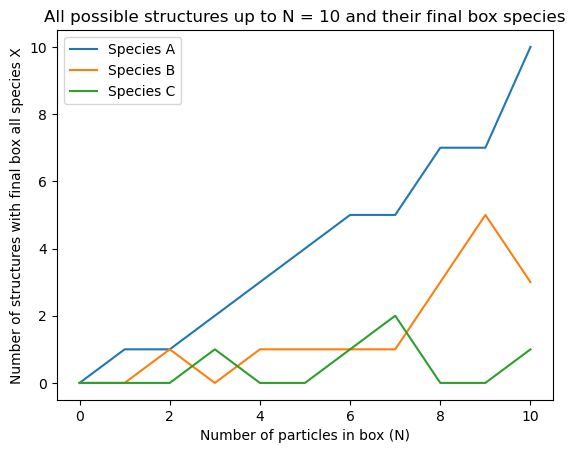

In [99]:
count_arr = np.zeros((3, N+1), dtype=int)

for n in range(1, N+1):
    a, b, c = count(n)
    count_arr[0][n] = a
    count_arr[1][n] = b
    count_arr[2][n] = c

xvals = np.arange(0, N+1)

for i in range(3):        # plot count against N
    plt.plot(xvals, count_arr[i], label=f"Species {specie[i]}")   
plt.title(f"All possible structures up to N = {N} and their final box species")
plt.xlabel("Number of particles in box (N)")
plt.ylabel("Number of structures with final box all species X")
plt.legend()
plt.show()


In [103]:
print_new_sim(np.array([3,1,5]))       # simulation of extension for a chosen box

The starting box is: [3 1 5] 

Particle in position 0 does not change:

[3 2 4] 

Particle in position 1 does not change:

[4 2 3] 

Particle in position 1 does not change:

[3 2 4] 

Particle in position 0 does not change:

[3 3 3] 

Particle in position 1 does not change:

[4 3 2] 

Particle in position 0 does not change:

[4 2 3] 

Particle in position 0 does not change:

[4 1 4] 

Particle in position 2 does not change:

[5 0 4] 

Particle in position 1 does not change:

[6 0 3] 

Particle in position 1 does not change:

[7 0 2] 

Particle in position 1 does not change:

[6 0 3] 

Particle in position 1 does not change:

[7 0 2] 

Particle in position 1 does not change:

[8 0 1] 

Particle in position 1 does not change:

[9 0 0] 

This box is all species A
